In [41]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [42]:
# Load the Excel file and check sheet names
xls = pd.ExcelFile('MS Main Dataset.xlsx')
print(xls.sheet_names)


# Correct the sheet names based on the output of the previous step
bengaluru_aqi = pd.read_excel(file_path, sheet_name='Bengaluru AQI')
fuel_registration = pd.read_excel(file_path, sheet_name='Fuel type Registration Vehicle')  # Adjust the name accordingly
vehicle_emission = pd.read_excel(file_path, sheet_name='vehicle_emission_dataset')

# Check if the data is loaded correctly
print(fuel_registration.head())

# Display the first few rows of each sheet
print(bengaluru_aqi.head())
print(fuel_registration.head())
print(vehicle_emission.head())


['Bengaluru AQI', 'Fuel type Registration Vehicle', 'vehicle_emission_dataset']
       Month  CNG ONLY  DIESEL  DIESEL/HYBRID  ELECTRIC(BOV)  LPG ONLY  \
0 2015-01-01      2612  260651              1            173       156   
1 2015-02-01      1925  226827              2            182       228   
2 2015-03-01      2037  241991              4            222       382   
3 2015-04-01      2052  214348              5            175       247   
4 2015-05-01      1769  211783              2            195       310   

   NOT APPLICABLE   PETROL  PETROL/CNG  
0            8705  1321517       23933  
1            9831  1279794       18361  
2           10665  1351525       20219  
3            8716  1319110       19416  
4            9048  1406050       18949  
        City       Date  PM2.5  PM10    NOx     CO2    SO2     O3  AQI
0  Bengaluru 2015-01-01    NaN   NaN  17.33  179.93   3.54  10.73  NaN
1  Bengaluru 2015-01-02    NaN   NaN  19.73  250.51   3.97  22.77  NaN
2  Bengaluru 201

In [43]:
# Convert the Date column in Bengaluru AQI data to datetime format
bengaluru_aqi['Date'] = pd.to_datetime(bengaluru_aqi['Date'], errors='coerce')

# Drop rows with missing values (if any)
bengaluru_aqi = bengaluru_aqi.dropna()
fuel_registration = fuel_registration.dropna()
vehicle_emission = vehicle_emission.dropna()

# Ensure the data looks correct
print(bengaluru_aqi.info())
print(fuel_registration.info())
print(vehicle_emission.info())


<class 'pandas.core.frame.DataFrame'>
Index: 2190 entries, 310 to 2690
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   City    2190 non-null   object        
 1   Date    2190 non-null   datetime64[ns]
 2   PM2.5   2190 non-null   float64       
 3   PM10    2190 non-null   float64       
 4   NOx     2190 non-null   float64       
 5   CO2     2190 non-null   float64       
 6   SO2     2190 non-null   float64       
 7   O3      2190 non-null   float64       
 8   AQI     2190 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 171.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Month           103 non-null    datetime64[ns]
 1   CNG ONLY        103 non-null    int64         
 2   DIESEL          10

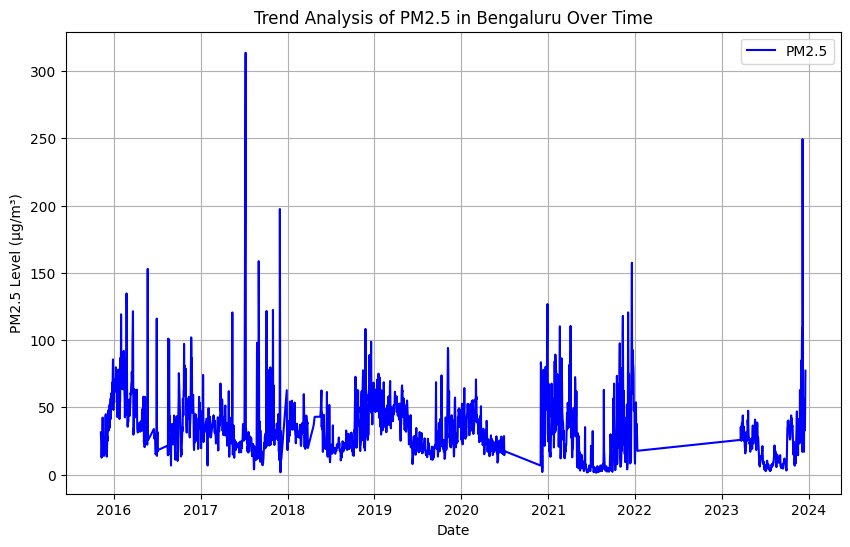

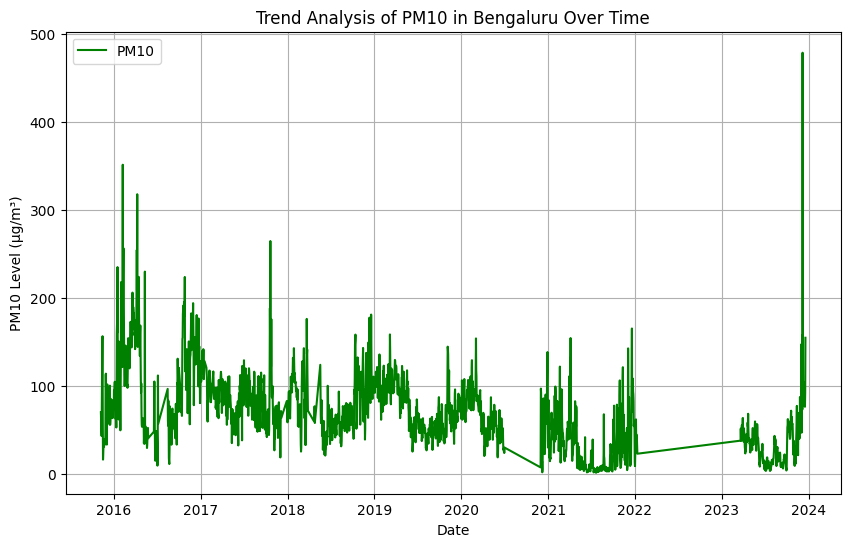

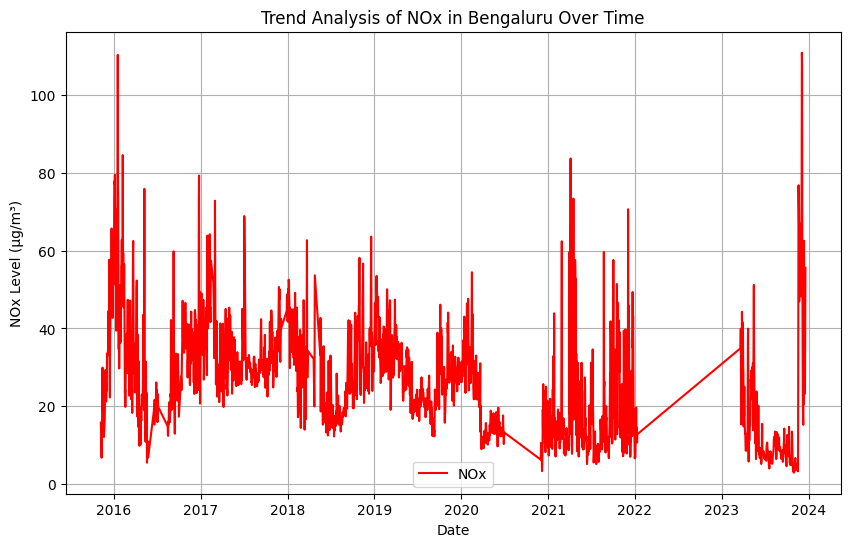

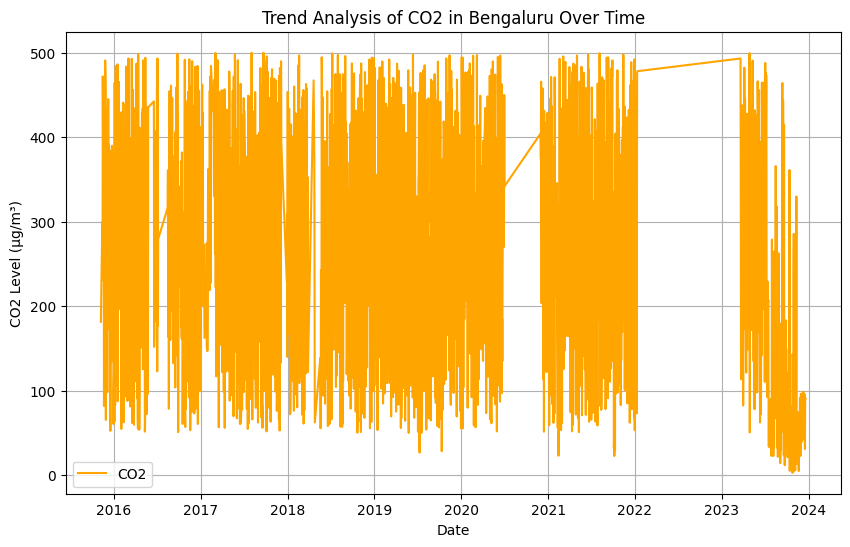

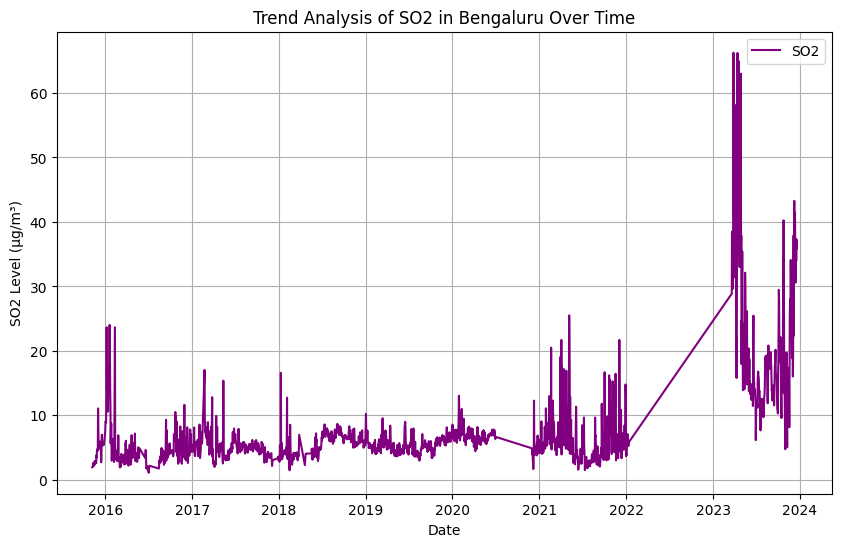

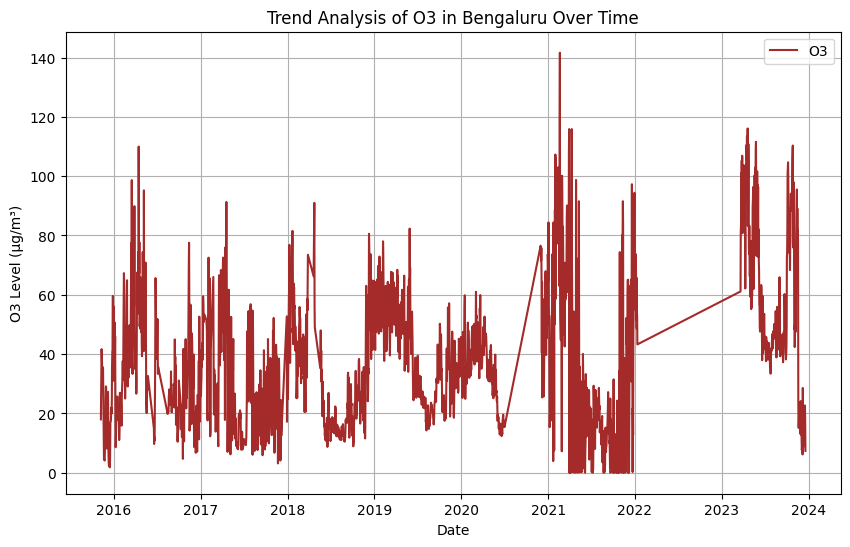

In [44]:
import matplotlib.pyplot as plt

# List of pollutants to analyze
pollutants = ['PM2.5', 'PM10', 'NOx', 'CO2', 'SO2', 'O3']

# Colors for each pollutant plot
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown']

# Loop through each pollutant and plot separately
for i, pollutant in enumerate(pollutants):
    plt.figure(figsize=(10,6))  # Create a new figure for each pollutant
    plt.plot(bengaluru_aqi['Date'], bengaluru_aqi[pollutant], color=colors[i], label=pollutant)

    # Add titles and labels
    plt.title(f'Trend Analysis of {pollutant} in Bengaluru Over Time')
    plt.xlabel('Date')
    plt.ylabel(f'{pollutant} Level (µg/m³)')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()


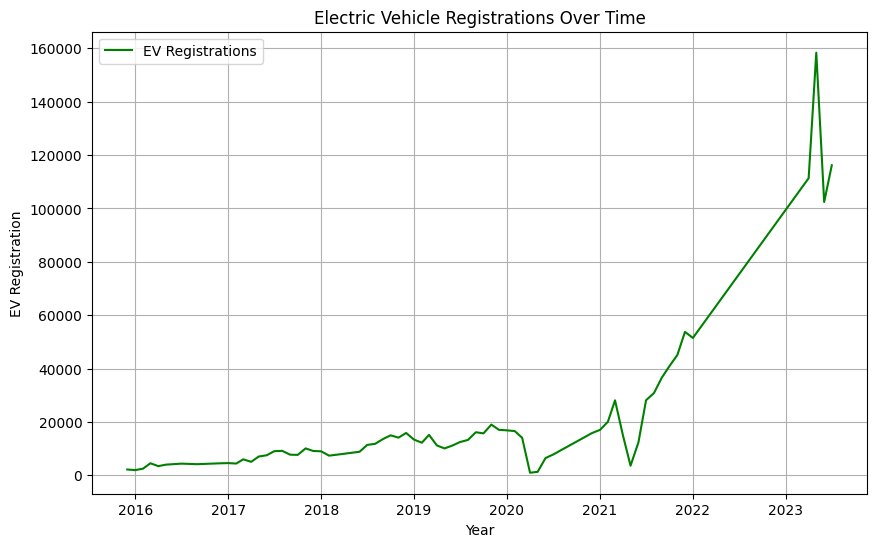

In [45]:
# Summing Electric Vehicle (EV) registrations by month
ev_registration = fuel_registration[['Month', 'ELECTRIC(BOV)']].groupby('Month').sum().reset_index()

# Merging the air quality data with EV registrations
merged_data = pd.merge(bengaluru_aqi, ev_registration, left_on='Date', right_on='Month', how='inner')

# Plot EV registrations
plt.figure(figsize=(10,6))

plt.plot(merged_data['Date'], merged_data['ELECTRIC(BOV)'], label='EV Registrations', color='green')

plt.title('Electric Vehicle Registrations Over Time')
plt.xlabel('Year')
plt.ylabel('EV Registration')
plt.legend()
plt.grid(True)
plt.show()


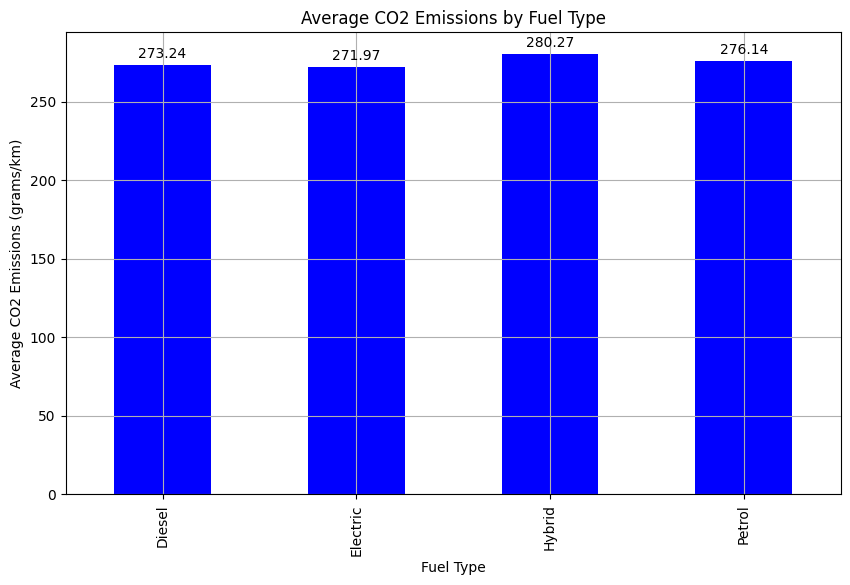

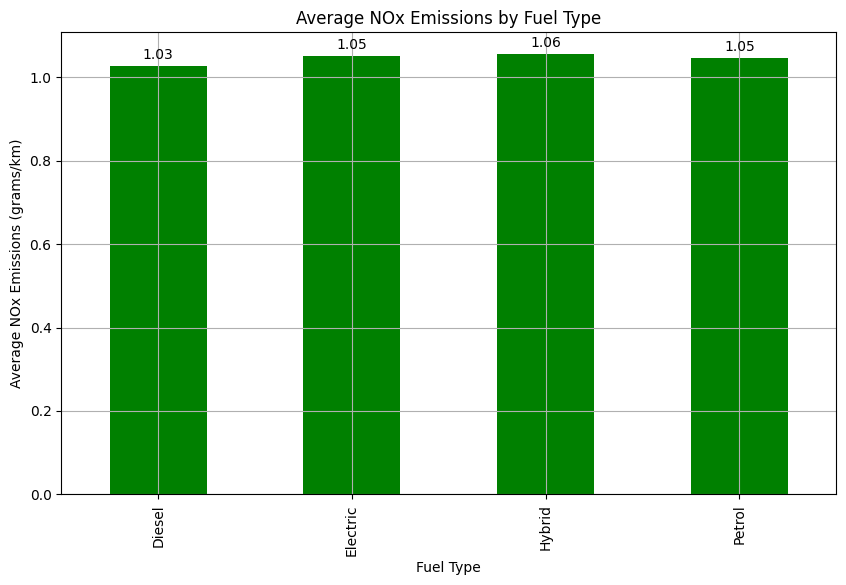

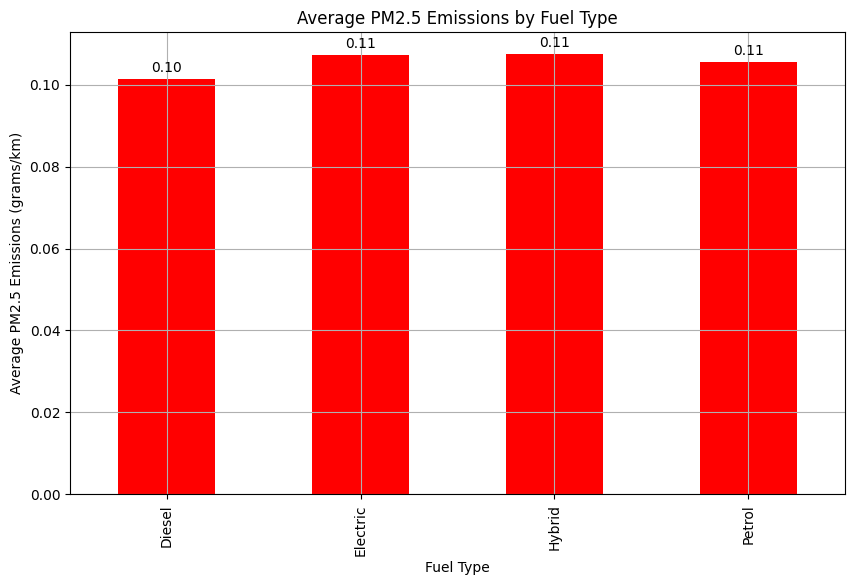

In [46]:
import matplotlib.pyplot as plt

# Grouping by Fuel Type to calculate the average emissions
emissions_by_fuel = vehicle_emission.groupby('Fuel Type')[['CO2 Emissions', 'NOx Emissions', 'PM2.5 Emissions']].mean()

# Define pollutants and their colors
pollutants = ['CO2 Emissions', 'NOx Emissions', 'PM2.5 Emissions']
colors = ['blue', 'green', 'red']

# Plot each pollutant separately with data labels
for i, pollutant in enumerate(pollutants):
    plt.figure(figsize=(10,6))  # Create a new figure for each pollutant
    ax = emissions_by_fuel[pollutant].plot(kind='bar', color=colors[i])

    # Set titles and labels
    plt.title(f'Average {pollutant} by Fuel Type')
    plt.ylabel(f'Average {pollutant} (grams/km)')
    plt.xlabel('Fuel Type')

    # Add data labels to the bars
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center', size=10, xytext=(0, 8),
                    textcoords='offset points')

    plt.grid(True)
    plt.show()


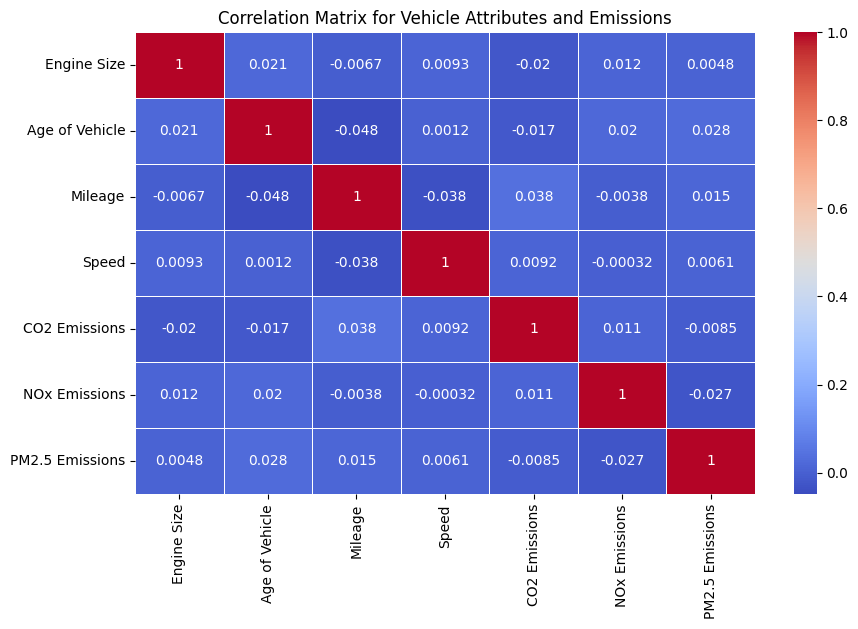

In [47]:
# Correlation matrix for the Vehicle Emission Dataset
corr_matrix = vehicle_emission[['Engine Size', 'Age of Vehicle', 'Mileage', 'Speed', 'CO2 Emissions', 'NOx Emissions', 'PM2.5 Emissions']].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Vehicle Attributes and Emissions')
plt.show()


Mean Squared Error: 1293.6666268277488
R-squared: 0.04449348249498375


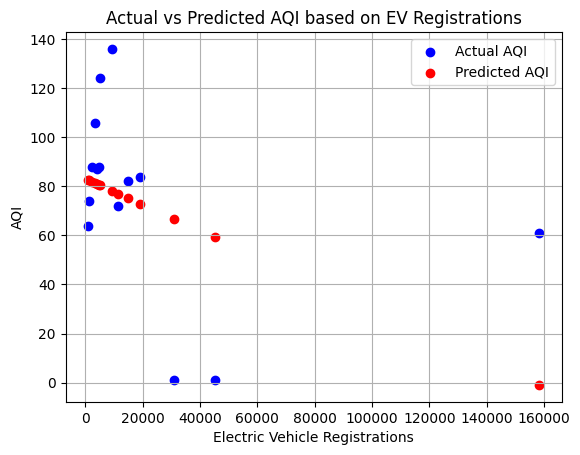

In [48]:
# Prepare data for regression analysis
X = merged_data[['ELECTRIC(BOV)']]  # Independent variable: EV registrations
y = merged_data['AQI']  # Dependent variable: AQI

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

# Plotting actual vs predicted AQI
plt.scatter(X_test, y_test, color='blue', label='Actual AQI')
plt.scatter(X_test, y_pred, color='red', label='Predicted AQI')
plt.title('Actual vs Predicted AQI based on EV Registrations')
plt.xlabel('Electric Vehicle Registrations')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()
